<a href="https://colab.research.google.com/github/Sauravhuskie/680---assignment-2/blob/main/CSCI_680_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##References:
1) https://stackoverflow.com/questions/32857544/nested-list-to-pandas-dataframe-with-headers

2) 
https://www.jeansnyman.com/posts/regression-with-scikit-learn/


3) https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Diabetes%20regression.html

4) https://stackoverflow.com/questions/5306079/python-how-do-i-convert-an-array-of-strings-to-an-array-of-numbers

5) https://pypi.org/project/simple-colors/

6) https://amueller.github.io/COMS4995-s20/slides/aml-11-interpretation-feature-selection/#26




#Assignment 5
For Assignment 5, you are required to train and interpret models using wine-quality dataset.  You can access the data from the following link. There are two csv files available on the link, but you only need to work on white-wine dataset. Treat this dataset as a regression problem where 1 is poor and 10 is excellent quality. Divide the dataset into training and testing. Use R-squared metrics for model evaluation. 

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/ 


##Data Preparation


In [8]:
#import pandas
import pandas as pd

**I** have uploaded the data to github. Therefore, it can be downloaded from github directly

In [9]:
# accessing Github
url = 'https://raw.githubusercontent.com/Sauravhuskie/CSCI-680---Applied-Machine-Learning/main/winequality-white.csv'
df1 = pd.read_csv(url , header = None) #creating data frame

In [10]:
#for loop to manipulate dataframe.
i=1 #for loop iterator
rows = [] # temporary array to store row values 
##following for loop puts the rows in the data set
for i in range (df1.size):
  tempRow = df1[0][i].split(';')#tempRow is for holding rows and splitting strings
  tempRow = [element.strip('"') for element in tempRow] # stripping " from the element
  #follwoing if statement removes empty row in 0 th index
  # this if statement converts string value to float
  if (i>0):
   tempRow = [float(i) for i in tempRow]  # converting row value to float
  rows.append(tempRow)  #appending temp ro to rows


In [11]:
#Crating Pandas dataframe
df = pd.DataFrame(rows[1:],columns=rows[0]) 

display(df) #seeing the dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


#Question1: Train a Random Forest Regressor for the dataset.Find the best model based on R-squared value using RandomizedSearchCV. [20 Marks]

In [ ]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor 

# creating X (features) and y (target) for dataset
X = df.drop("quality", axis=1)
y = df["quality"]

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
#crating random regressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)#fitting the random regression model


In [13]:
# Hyperparameter grid RandomizedSearchCV will search over
#creating a gread to train different paramenters.
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Setup RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
#fitting the model
rs_model = RandomizedSearchCV(estimator=model,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                             )

# Fit the RandomizedSearchCV version of rs_model
rs_model.fit(X_train, y_train)

# Find the best hyperparameters found by RandomizedSearchCV
rs_model.best_params_

# Make predictions with the best hyperparameters
rs_y_preds = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#printing out the parameters
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, rs_y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, rs_y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, rs_y_preds):.2f}")

Regression model metrics on the test set:
R^2: 0.47
MAE: 0.45
MSE: 0.40


In [14]:
# Printing out Regressor values
print ("Best model Parameters \n", rs_model.best_params_)

Best model Parameters 
 {'n_estimators': 500, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


 Best Model Parameters based on R-squared value:
 1. 'n_estimators': 500
 2. 'min_samples_split': 4
 3. 'min_samples_leaf': 1
 4. 'max_features': 'sqrt'
 5. 'max_depth': 20


#Question 2: Use the model from question 1 for model interpretation and rank the features based on permutation importance. [15 Marks] 

In [ ]:
#creating model from question 1
rf = RandomForestRegressor(n_estimators=1200, min_samples_split = 2,min_samples_leaf= 1, max_features= 'sqrt', max_depth= 30)
#fitting the model
rf.fit(X_train, y_train)

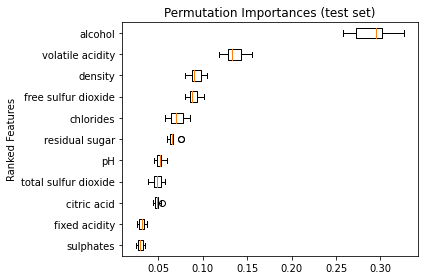

In [16]:
#Imporing permutation impotance and pyplot
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

#creating permutation importance as resul
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
#indexing importances ad mean
sorted_idx = result.importances_mean.argsort()

###creating box plot to visualize
#creating subplots
fig, ax = plt.subplots()
#creating boxplots
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
#creating title
ax.set_title("Permutation Importances (test set)")
#creting y label
ax.set_ylabel("Ranked Features")
#defining layout
fig.tight_layout()

#creating label
plt.show()

In [73]:
meanResult = list(result.importances_mean)

In [ ]:
#installing coloroma and simple colors for bold font
!pip install colorama
!pip install simple-colors

In [75]:
from textwrap import indent
from colorama import init
from termcolor import colored
from simple_colors import *
#creating feature list based on ranks
feature_ranks = list(reversed(X_test.columns[sorted_idx][0:]))
#printing Table heading
print(green('         Ranking Features in according to Permutation Importance', 'bright'))

#creating Dataframe
irf= pd.DataFrame(range(1,12,1),feature_ranks)

#creating column headings
col_names = ["Permutation Importance Rank"]

#creating columns
irf.columns = col_names

#Creating feature name
irf.index.name='Feature'
#displayng table
display(irf)


         Ranking Features in according to Permutation Importance


,Permutation Importance Rank
Feature,
alcohol,1
volatile acidity,2
density,3
free sulfur dioxide,4
chlorides,5
residual sugar,6
pH,7
total sulfur dioxide,8
citric acid,9


#Question3. Use the model from question 1 for model interpretation and interpret first sample from test data using SHAP algorithm. Install SHAP using pip. See one example - 
https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Diabetes%20regression.html  

[20 Marks]

Recreating the dataset and model due to runtime discontinuation

In [ ]:
#Installing Shap
!pip install shap #installing SHAP

     |████████████████████████████████| 564 kB 5.2 MB/s 


In [ ]:
#modifying data set for SHAP alogrithm
Xa = df.drop("quality", axis=1)
ya = df["quality"]

In [ ]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size=0.2)

#recreating Random Forest Regressor due to runtime discontinuation
from sklearn.ensemble import RandomForestRegressor
# Institate and fit the model (on the training set)
rf = RandomForestRegressor(n_estimators=1200, min_samples_split = 2,min_samples_leaf= 1, max_features= 'sqrt', max_depth= 30)
#fitting the model
rf.fit(Xa_train, ya_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=1200)

In [ ]:
import shap
import time
import numpy as np
# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
Xa_train_summary = shap.kmeans(Xa_train, 10)

#creating accuracy 
def print_accuracy(f):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((f(X_test) - y_test)**2))))
    time.sleep(0.5) # to let the print get out before any progress bars
shap.initjs()

Using 3918 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
Using 3918 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
Using 3918 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


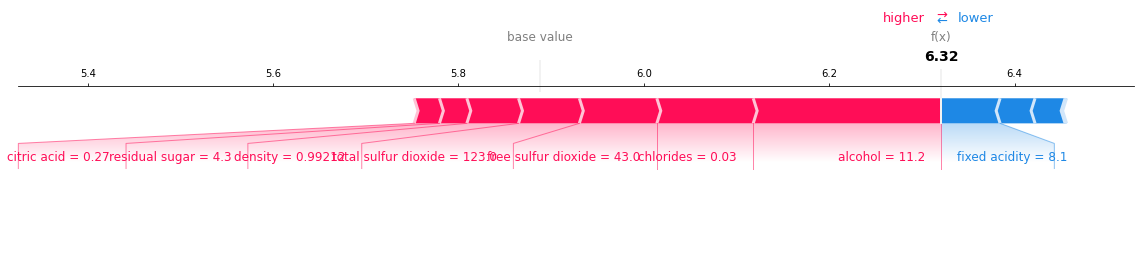

In [ ]:
import warnings
#Using warnngs  to avoid long output
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    #creating kernel explainer from shap
    ex = shap.KernelExplainer(rf.predict, Xa_train.values) 
    ex = shap.KernelExplainer(rf.predict, Xa_train.values)
    ex = shap.KernelExplainer(rf.predict, Xa_train.values)
    #creating shap values
    shap_values = ex.shap_values(Xa_test.iloc[0,:])
    #creating shap plot
    shap.force_plot(ex.expected_value, shap_values, Xa_test.iloc[0,:], matplotlib=True)
    #java script to plot shap
    shap.initjs()


## Interpretation
The first sample has value of 6.32 and the base value is 5.8. Alcohol predicted the highest contribution in the outcome and the effect of alcohol is positive. Cholorides, sulfur dioxide, and sulfur clorride also have good positive impact on the outcome. Whereas, fixed acidity has highest negetive impact of 8.1. 

#Question 4: Visualize partial dependence plot for each feature in the dataset using Sklearn. [15 Marks]  

In [76]:
# REcrating the model due to runtime discontinuation
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor()

In [78]:
#getting the data again for runtime discontinuation
X1 = df.drop("quality", axis=1)
y1 = df["quality"]

#getting column values
X3 = X1[:].values
y3 = y1[:].values

#creating float from string for dependence plot
y = [float(numeric_string) for numeric_string in y3]
X = [[float(string) for string in inner] for inner in X3]

In [ ]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
rf1.fit(X_train, y_train) #fitting the dataset


##Univariate Partial Dependence Plots


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


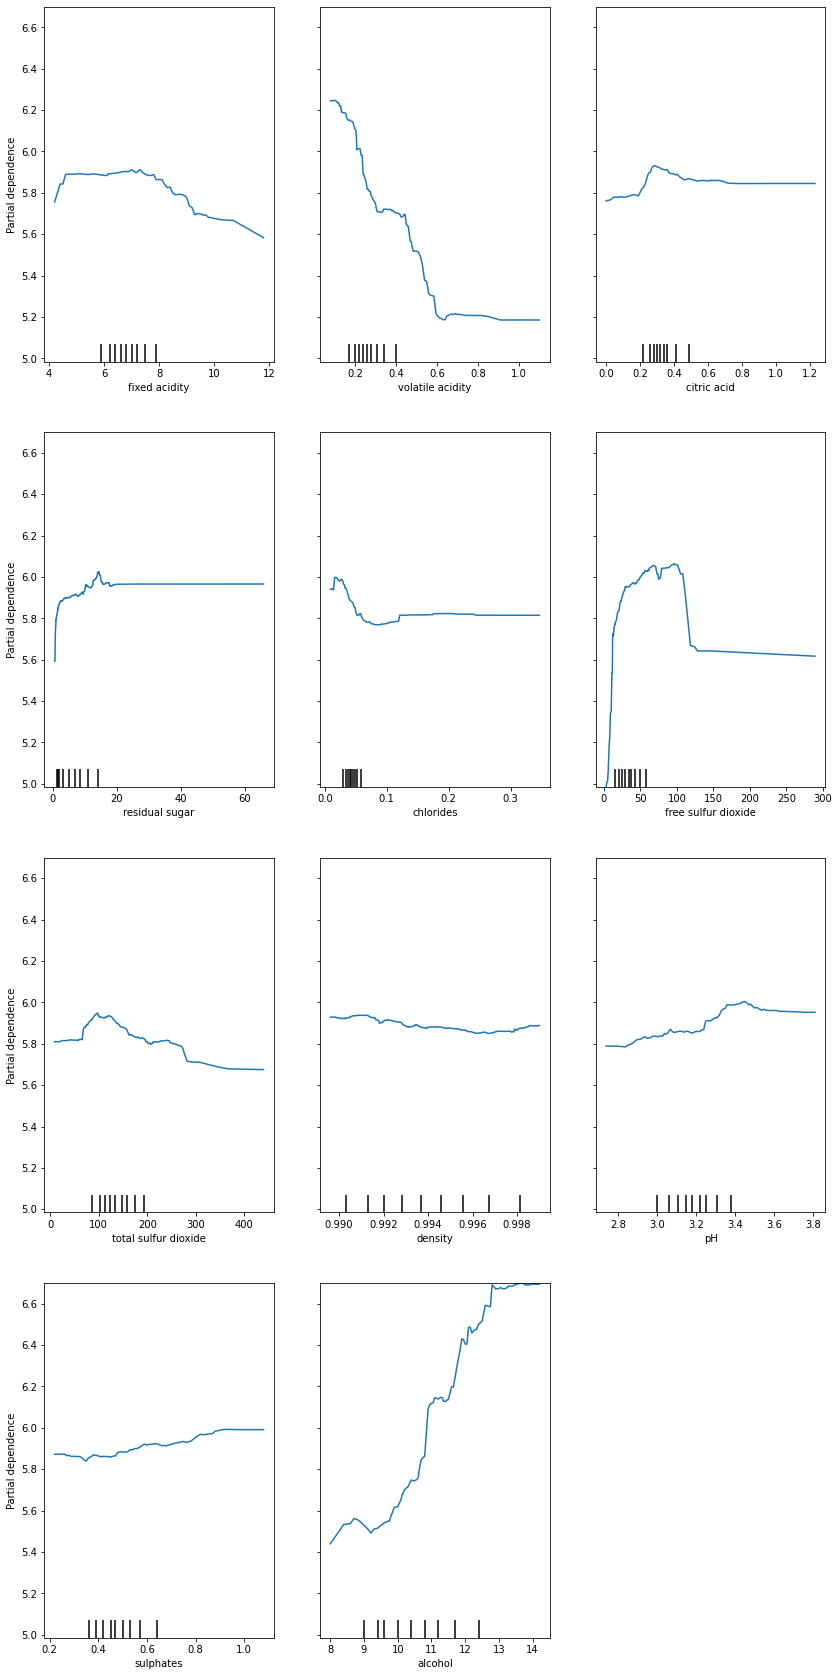

In [83]:
#creating features list
features = list(X1.columns.values)
import matplotlib.pyplot as plt
from sklearn.inspection import plot_partial_dependence
#creating subplots
fig, ax1 = plt.subplots(figsize=(14, 30))
#creating plots
plot_partial_dependence(rf1, X_train, range(11), n_cols= 3,feature_names=features, grid_resolution=500, ax=ax1)
plt.show() #showing the plot

##Bivariate Partial Dependence Plots


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


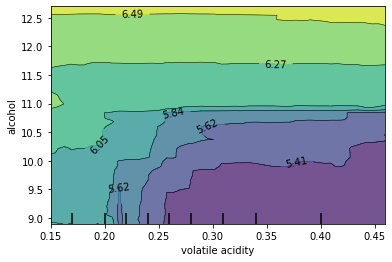

In [ ]:
import numpy as np
plot_partial_dependence(
    rf1, X_train, [np.argsort(rf1.feature_importances_)[-2:]],
    feature_names=features, n_jobs=3, grid_resolution=50)

#Question 5: Visualize ICE plot for each feature using Sklearn.     [15 Marks] 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


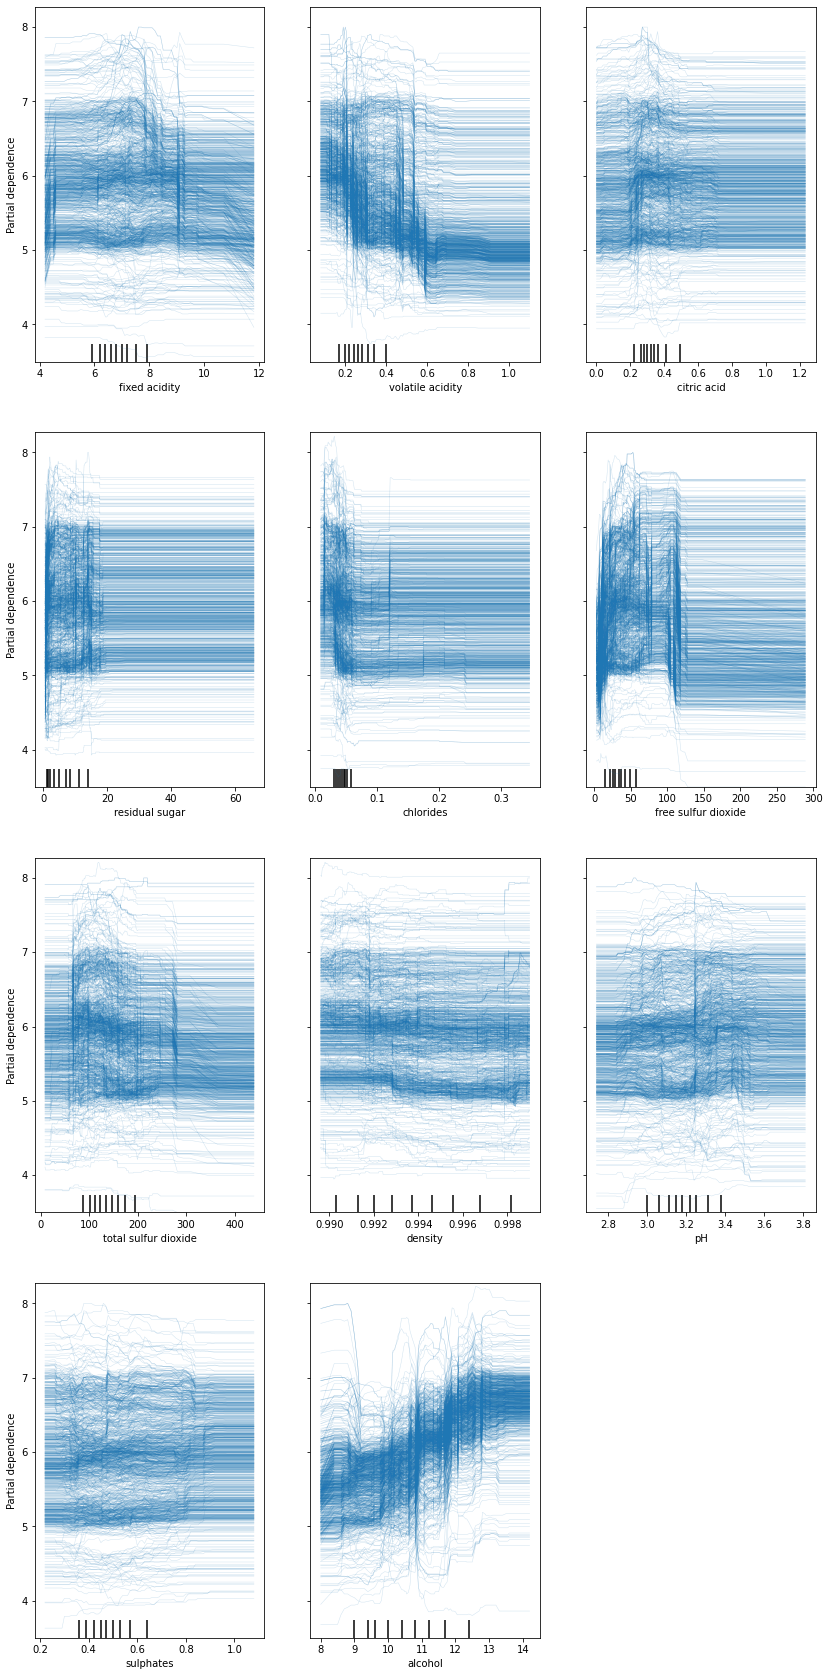

In [88]:
#Creating ICE Plot
fig, ax = plt.subplots(figsize=(14, 30))
#creating ICE plot using kind as individual
plot_partial_dependence(rf1, X_train, range(11), n_cols= 3,
                        feature_names=features, grid_resolution=500, ax=ax,kind='individual',
                        ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5}, 
                        pd_line_kw={"color": "tab:red", "linestyle": "--"})
plt.show()

#Question 6: Write a brief report on which technique you found most useful and why.
 [15 Marks] 

**Observations:**
1. Permuatation measure marginal influence of one feature but it is slow.
2. SHAP is really slow and takes a lot of time and gets disconnected. Although visualization is really good.
3. Partial dependence is marginal dependence of prediction on one (or two features). Which is better way to select features.
4. ICE BOX is good when partial dependece consist positive and negetive value. This is not relevant for the present dataset.

**Inference:**
I prefer Permutation Importance because it is easy to understand and easy to visualize and rank features according to imporatance.  My second choice is Partial dependence because we can visualize individual and bivariate interacation of variables. I do not like SHAP because it is really slow and resource intensive and ICE box is redundant for the whithe wine data. 
